In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
path_corpus = Path('../../data/corpora/tutby_126784.csv')

# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v.npy')
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_v2.npy')
# path_emb = Path('../../data/emb/emb_tutby_126784_bert.npy')
path_emb = Path('../../data/emb/emb_clean_tutby_126784_w2v_idf.npy')

# path_emb_proc = Path('../../data/emb/emb_clean_tutby_126784_d2v_ppa2.npy')
# path_emb_proc = Path('../../data/emb/emb_clean_tutby_126784_d2v_v2_ppa2.npy')
# path_emb_proc = Path('../../data/emb/emb_tutby_126784_bert_ppa2.npy')
# path_emb_proc = Path('../../data/emb/emb_tutby_126784_bert_ppa4.npy')
path_emb_proc = Path('../../data/emb/emb_clean_tutby_126784_w2v_idf_ppa2.npy')

In [3]:
data = pd.read_csv(path_corpus)

print(data.shape)
display(data.head(5))

(126784, 6)


,url,label,header,date,document,tags
0,https://news.tut.by/550306.html,Футбол,"Тренер ""Шахтера"": Оправдываться не хочу. Все в...",2017-07-06T21:35:00+03:00,Главный тренер солигорского «Шахтера» Олег Куб...,['футбол']
1,https://news.tut.by/550307.html,Общество,"""Зацветет"" ли каменная роза на ул. Комсомольск...",2017-07-07T09:25:00+03:00,Планы по восстановлению рисунка есть. Но пока ...,"['архитектура', 'живопись', 'ЖКХ']"
2,https://news.tut.by/550308.html,Общество,Фотофакт. Скамейка в виде пожарной машины появ...,2017-07-07T09:27:00+03:00,Областное управление МЧС ко Дню пожарной служб...,['министерства']
3,https://news.tut.by/550309.html,Футбол,Станислав Драгун дебютировал за БАТЭ в матче с...,2017-07-06T22:11:00+03:00,Чемпион Беларуси БАТЭ воспользовался паузой в ...,"['футбол', 'БАТЭ']"
4,https://news.tut.by/550310.html,В мире,Генпрокурор Украины пообещал открыть уголовное...,2017-07-06T22:28:00+03:00,Генпрокуратура Украины откроет уголовное произ...,"['Ситуация в Украине', 'государственные перево..."


In [4]:
with open(path_emb, 'rb') as file:
    emb = np.load(file)
    
print(emb.shape)

(126784, 300)


In [5]:
# index = ~np.isnan(emb).any(axis=1)
# emb = emb[index]
# data = data.iloc[index]

In [6]:
%%time

emb_m = emb - np.mean(emb, axis=0)

n_components = 2
pca = PCA(n_components=n_components).fit(emb_m)
u = pca.components_

processed = emb_m - (emb_m @ u.T @ u)

# index_nan = np.arange(len(index))[~index]
# processed = np.insert(processed, index_nan, np.nan, axis=0)

with open(path_emb_proc, 'wb') as file:
    np.save(file, processed)

print(processed.shape)

(126784, 300)
Wall time: 4.24 s


In [7]:
print(np.linalg.norm(emb.mean(axis=0)))
print(np.linalg.norm(emb, axis=1).mean())
print(np.linalg.norm(processed.mean(axis=0)))
print(np.linalg.norm(processed, axis=1).mean())

0.0002195135857850382
0.00027866780939942923
nan
nan


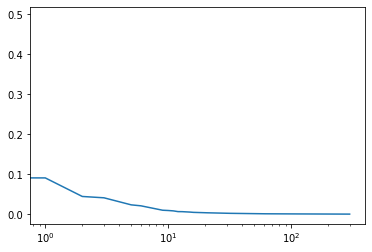

In [8]:
variances = PCA().fit(emb).explained_variance_ratio_

plt.xscale('log')
plt.plot(variances)
plt.show()

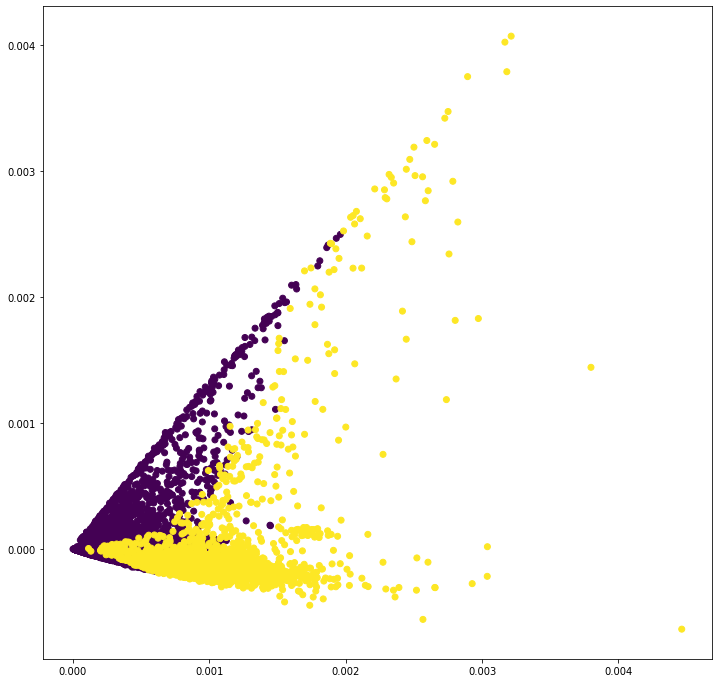

In [12]:
emb2 = pca.transform(emb)

emb2f = emb2[data['label'] == 'Футбол']
emb2g = emb2[data['label'] == 'Гаджеты']
emb2a = emb2[data['label'] == 'Автоновости']
emb2n = emb2[data['label'] == 'Наука']
emb2s = emb2[data['label'] == 'Строительство']

lengths = data['document'].str.len()
index = lengths.argsort().values
lengths = lengths.iloc[index]
emb2 = emb2[index]


plt.figure(figsize=(12, 12))

x = 0
y = 1

plt.scatter(emb2[:,x], emb2[:,y], c=(lengths > 10000))

# plt.scatter(emb2f[:,x], emb2f[:,y])
# plt.scatter(emb2g[:,x], emb2g[:,y])
# plt.scatter(emb2n[:,x], emb2n[:,y])
# plt.scatter(emb2a[:,x], emb2a[:,y])
# plt.scatter(emb2s[:,x], emb2s[:,y])

plt.show()